In [2]:
import time
import json
from base64 import b64decode

import requests
from bs4 import BeautifulSoup

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [42]:
# The data we're using - Thank you Open North!
parlimentary_sessions = ['43-1', '43-2']
url_template = 'https://openparliament.ca/bills/{}/C-{}/?singlepage=1'.format

bill_ranges = {
    '43-1': [
        [2, 21],
        [201, 246]
    ],
    '43-2': [
        [2, 37],
        [202, 324]
    ]
}

In [3]:
# Full text of the parliamentary sessions
# [{
#   text: string - text of speech
#   party: string - MP political affiliation at time of speaking
#   img: string - url to image of MP
#   name: string - MP name
#   index: int - speaker order on current bill
#   bill: string - bill ID
# }]
all_data = json.load(open('./parliament_text_raw.json'))


# Parliamentary session text organized by relative frequency of word usage
# {
#    [word: string] : {
#         Bloc?: float;
#         Conservative?: float;
#         Green?: float;
#         Independents?: float;
#         Liberal?: float;
#         NDP?: float;
#    }
# }
word_dict = json.load(open('./parliament_text_by_word.json'))

In [4]:
def sortAlphabetically(party_name):
    return [word_dict[party_name][key] for key in sorted(word_dict[party_name].keys(), key=lambda x:x.lower())
           if key not in ['', 'Independent']][:5]

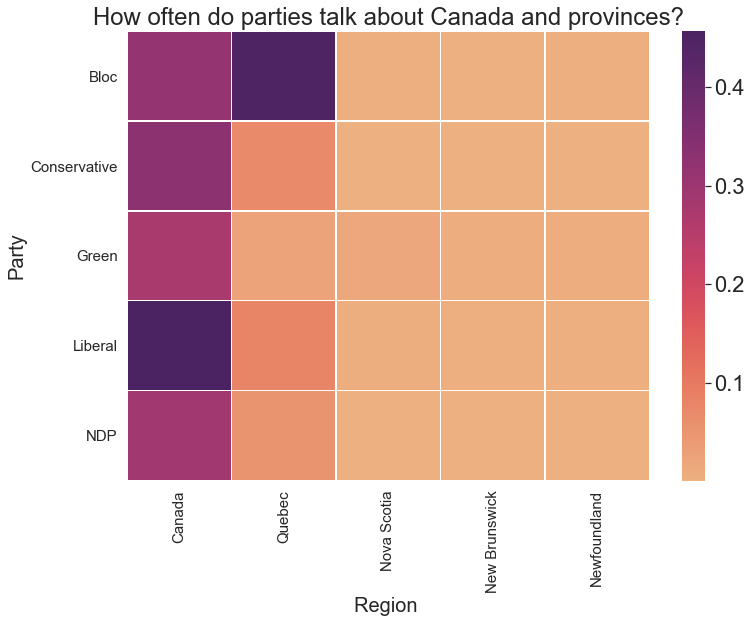

In [7]:
# Chart 1 - How often do parties talk about Canada and provinces? (Atlantic Canada version)

uniform_data = [
    sortAlphabetically('canada'),
    sortAlphabetically('quebec'),
    sortAlphabetically('nova'),
    sortAlphabetically('brunswick'),
    sortAlphabetically('newfoundland'),
]

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.set(font_scale=2)

ax = sns.heatmap(
    list(map(list, zip(*uniform_data))), 
    linewidth=0.5, 
    cmap=sns.color_palette("flare", as_cmap=True), 
    xticklabels=['Canada', 'Alberta', 'Ontario', 'Quebec', 'Newfoundland'],
    yticklabels=['Bloc', 'Conservative', 'Green', 'Liberal', 'NDP'],
)

ax.set(
    title='How often do parties talk about Canada and provinces?',
)

ax.set_ylabel('Party',fontsize=20);
ax.set_yticklabels(['Bloc', 'Conservative', 'Green', 'Liberal', 'NDP'], size = 15)

ax.set_xlabel('Region ',fontsize=20);
ax.set_xticklabels(['Canada', 'Quebec', 'Nova Scotia', 'New Brunswick', 'Newfoundland'], size = 15)

plt.show()

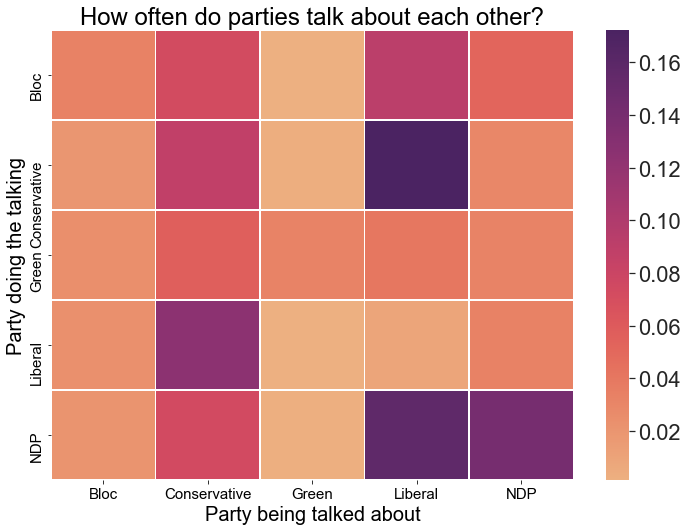

In [5]:
# Chart 2 - How often do parties talk about each other?

uniform_data = [
    sortAlphabetically('bloc'),
    sortAlphabetically('conservatives'),
    #[x + y for x, y in zip(sortAlphabetically('conservatives'), sortAlphabetically('conservative'))], - to combine words
    sortAlphabetically('greens'),
    sortAlphabetically('liberals'),
    sortAlphabetically('ndp'),
]

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.set(font_scale=2)

ax = sns.heatmap(
    list(map(list, zip(*uniform_data))), 
    linewidth=0.5, 
    cmap=sns.color_palette("flare", as_cmap=True), 
    xticklabels=['Bloc', 'Conservative', 'Green', 'Liberal', 'NDP'],
    yticklabels=['Bloc', 'Conservative', 'Green', 'Liberal', 'NDP']
)

ax.set(
    title='How often do parties talk about each other?',
)

ax.set_xlabel('Party being talked about',fontsize=20);
ax.set_ylabel('Party doing the talking',fontsize=20);
ax.set_yticklabels(['Bloc', 'Conservative', 'Green', 'Liberal', 'NDP'], size = 15)
ax.set_xticklabels(['Bloc', 'Conservative', 'Green', 'Liberal', 'NDP'], size = 15)


plt.show()

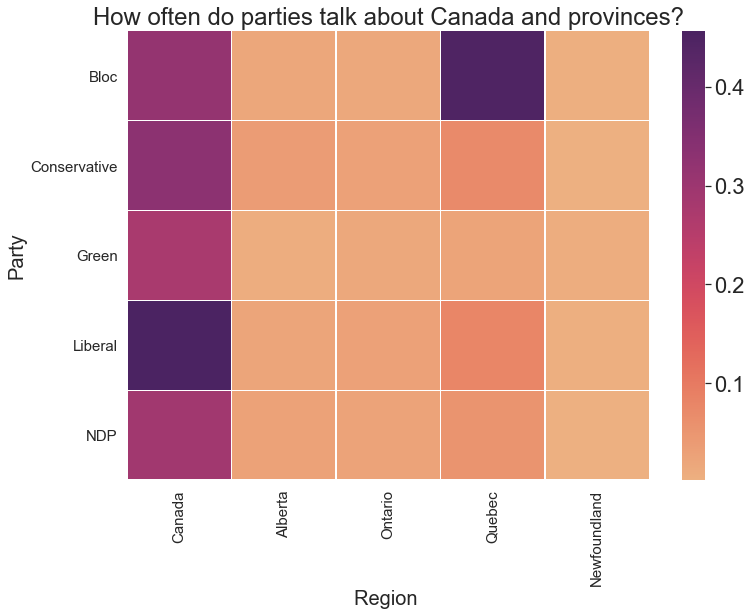

In [6]:
# Chart 3 - How often do parties talk about Canada and provinces?

uniform_data = [
    sortAlphabetically('canada'),
    sortAlphabetically('alberta'),
    sortAlphabetically('ontario'),
    sortAlphabetically('quebec'),
    sortAlphabetically('newfoundland'),
]

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.set(font_scale=2)

ax = sns.heatmap(
    list(map(list, zip(*uniform_data))), 
    linewidth=0.5, 
    cmap=sns.color_palette("flare", as_cmap=True), 
    xticklabels=['Canada', 'Alberta', 'Ontario', 'Quebec', 'Newfoundland'],
    yticklabels=['Bloc', 'Conservative', 'Green', 'Liberal', 'NDP'],
)

ax.set(
    title='How often do parties talk about Canada and provinces?',
)

ax.set_ylabel('Party',fontsize=20);
ax.set_yticklabels(['Bloc', 'Conservative', 'Green', 'Liberal', 'NDP'], size = 15)

ax.set_xlabel('Region ',fontsize=20);
ax.set_xticklabels(['Canada', 'Alberta', 'Ontario', 'Quebec', 'Newfoundland'], size = 15)

plt.show()

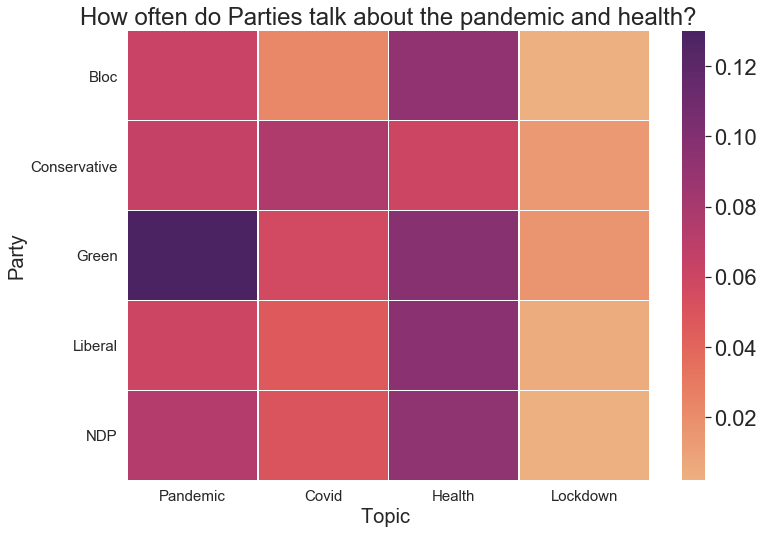

In [8]:
# Chart 4 - How often do Parties talk about the pandemic and health?

uniform_data = [
    sortAlphabetically('pandemic'),
    sortAlphabetically('covid'),
    sortAlphabetically('health'),
    sortAlphabetically('lockdowns'),
]

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.set(font_scale=2)

ax = sns.heatmap(
    list(map(list, zip(*uniform_data))), 
    linewidth=0.5, 
    cmap=sns.color_palette("flare", as_cmap=True), 
    xticklabels=['Pandemic', 'Covid', 'Health', 'Lockdown',],
    yticklabels=['Bloc', 'Conservative', 'Green', 'Liberal', 'NDP'],
)

ax.set(title='How often do Parties talk about the pandemic and health?')
ax.set_ylabel('Party',fontsize=20);
ax.set_yticklabels(['Bloc', 'Conservative', 'Green', 'Liberal', 'NDP'], size = 15)

ax.set_xlabel('Topic ',fontsize=20);
ax.set_xticklabels(['Pandemic', 'Covid', 'Health', 'Lockdown'], size = 15)

plt.show()

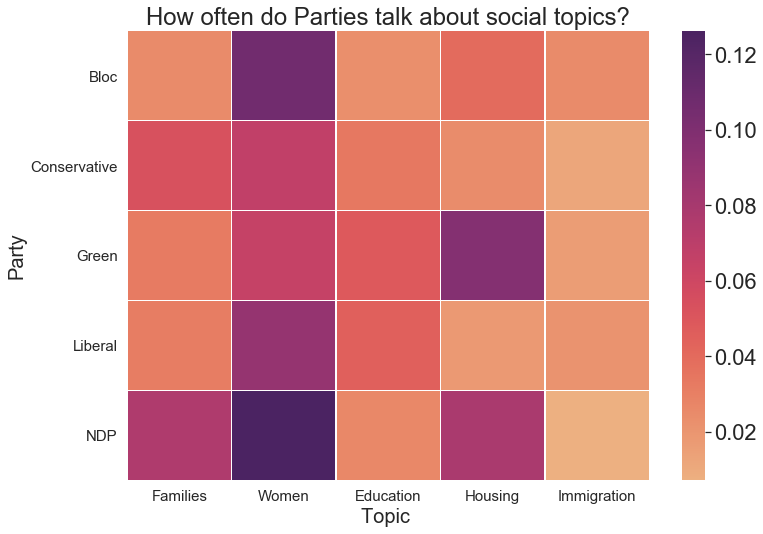

In [9]:
# Chart 5 - How often do Parties talk about social topics?


uniform_data = [
    sortAlphabetically('families'),
    sortAlphabetically('women'),
    sortAlphabetically('education'),
    sortAlphabetically('housing'),
    sortAlphabetically('immigration'),
]

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.set(font_scale=2)

ax = sns.heatmap(
    list(map(list, zip(*uniform_data))), 
    linewidth=0.5, 
    cmap=sns.color_palette("flare", as_cmap=True), 
    xticklabels=['Climate', 'Women', 'Indigenous', 'Housing', 'Immigration'],
    yticklabels=['Bloc', 'Conservative', 'Green', 'Liberal', 'NDP'],
)

ax.set(title='How often do Parties talk about social topics?')
ax.set_ylabel('Party',fontsize=20);
ax.set_yticklabels(['Bloc', 'Conservative', 'Green', 'Liberal', 'NDP'], size = 15)

ax.set_xlabel('Topic ',fontsize=20);
ax.set_xticklabels(['Families', 'Women', 'Education', 'Housing', 'Immigration'], size = 15)

plt.show()

In [ ]:
# Chart 6 - Economic Topics

uniform_data = [
    sortAlphabetically('tax'),
    sortAlphabetically('money'),
    sortAlphabetically('debt'),
    sortAlphabetically('corporations'),
    sortAlphabetically('families'),
]

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.set(font_scale=2)

ax = sns.heatmap(
    list(map(list, zip(*uniform_data))), 
    linewidth=0.5, 
    cmap=sns.color_palette("flare", as_cmap=True), 
    xticklabels=['Tax', 'Money', 'Debt', 'Corporations', 'Workers',],
    yticklabels=['Bloc', 'Conservative', 'Green', 'Liberal', 'NDP'],
)

ax.set(title='Economic Topics')
ax.set_ylabel('Party',fontsize=20);
ax.set_yticklabels(['Bloc', 'Conservative', 'Green', 'Liberal', 'NDP'], size = 15)

ax.set_xlabel('Topic ',fontsize=20);
ax.set_xticklabels(['Tax', 'Money', 'Debt', 'Corporations', 'Workers'], size = 15)

plt.show()

In [ ]:
### Appendix 

# This is how you transform all_data into word_dict

# WARNING - rake_nltk not included in requirements.txt (pip install rake_nltk)
from rake_nltk import Rake, Metric

# replaceString not necssary for all use-cases but if you're sending data over the wire
# you could hit unicode issues if you don't do this
def replaceString(text):
    if not text: return ''
    text = text.strip().replace('“', '"').replace('—', '-').replace('”', '"')
    text = text.replace('’', "'").replace('‑', '-').replace('\n', '').replace('…', '...')
    text = text.replace('–', '-').replace('‘', "'").replace('\u2018', "'").replace('\u201c', '"')
    return text

def normalizeScore(word_count, total_count):
    return round(100 * word_count / total_count, 4)

organized_data = {}
for row in all_data:
    name = row['name']
    text = replaceString(row['text'])
    if name not in organized_data:
        organized_data[name] = {
            'text': organized_data[name]['text'] + [text] if name in organized_data else [text],
            'all_text': organized_data[name]['all_text'] + ' {}'.format(text) if name in organized_data else text,
            'party': row['party']
        }
    else:
        organized_data[name]['text'] += [text]
        organized_data[name]['all_text'] += ' {}'.format(text)
        
party_data = {}
for name, values in organized_data.items():
    party = values['party']
    if party in party_data:
        party_data[party] += ' {}'.format(values['all_text'])
    else:
        party_data[party] = values['all_text']
        

rake_nltk_var = Rake(min_length=1, max_length=2, ranking_metric=Metric.WORD_FREQUENCY)

party_words = {}
party_totals = {}
for key in party_data.keys():
    rake_nltk_var.extract_keywords_from_text(party_data[key])
    keyword_extracted = rake_nltk_var.get_word_frequency_distribution()
    party_words[key] = keyword_extracted
    party_totals[key] = sum([v for v in keyword_extracted.values()])


word_dict = {}
for key, words in party_words.items():
    for word in words.keys():
        if word in word_dict:
            word_dict[word][key] = normalizeScore(words[word], party_totals[key])
        else:
            word_dict[word] = { key: normalizeScore(words[word], party_totals[key]) }
